# Problem Statement:

"Given a dataset containing cricket player attributes such as performance metrics, playing styles, and decision-making skills across various game formats, the goal of this project is to implement machine learning clustering techniques to categorize players into distinct groups. The identified clusters should represent meaningful patterns in player characteristics, enabling a deeper understanding of the diversity in playing styles and decision-making strategies across different cricket formats."

# Objective:

Cluster cricket players based on their performance, playing styles and decision-making for different game formats. 

# Importing Libraries:

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv(r"C:\Users\vikas\Coding\ML\Projects\Cricket-Players (Clustering)\Cricket.csv", encoding = "latin")

df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


# Data Description:

In [47]:
# MAT  -- no. of matches
# NO   -- Not out
# Runs -- total runs
# HS   -- Highest score
# Ave  -- Average
# BF   -- Balls Faced
# Span -- No. of years experience

# EDA

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.2+ KB


In [49]:
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [50]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [51]:
df.head(2)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15


In [52]:
# above, I can see that column "Span" will create problem in future in calulation/modeling part

# Column Span basically means no. of years experience of a player

# So, we will convert this column into years of experience

In [53]:
# Step 1 : 

# I will make 2 d/f columns as start & end


df[["strt","end"]] = df.Span.str.split("-", expand = True)

# "-"  --> on the basis of "-" we are seprating the column

In [54]:
df.head(2)


# Here I can see I have 2 new columns in last

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,strt,end
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  strt    79 non-null     object 
 14  end     79 non-null     object 
dtypes: float64(2), int64(8), object(5)
memory usage: 9.4+ KB


In [56]:
df[["strt","end"]] = df[["strt","end"]].astype(int)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  strt    79 non-null     int32  
 14  end     79 non-null     int32  
dtypes: float64(2), int32(2), int64(8), object(3)
memory usage: 8.8+ KB


In [58]:
# Now calculate diffirence


df["exp"] = df["end"] - df["strt"]

In [59]:
# Now drop unwanted columns like ["Span","strt","end"]


df = df.drop(["Span","strt","end"], axis = 1)

In [60]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [61]:
# HS Column


df["HS"] = df["HS"].str.extract("(\d+)")

In [62]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [63]:
# Now converting the column "HS" into int


df["HS"] = df["HS"].astype(int)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int32  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  exp     79 non-null     int32  
dtypes: float64(2), int32(2), int64(8), object(1)
memory usage: 7.5+ KB


# Visualization:

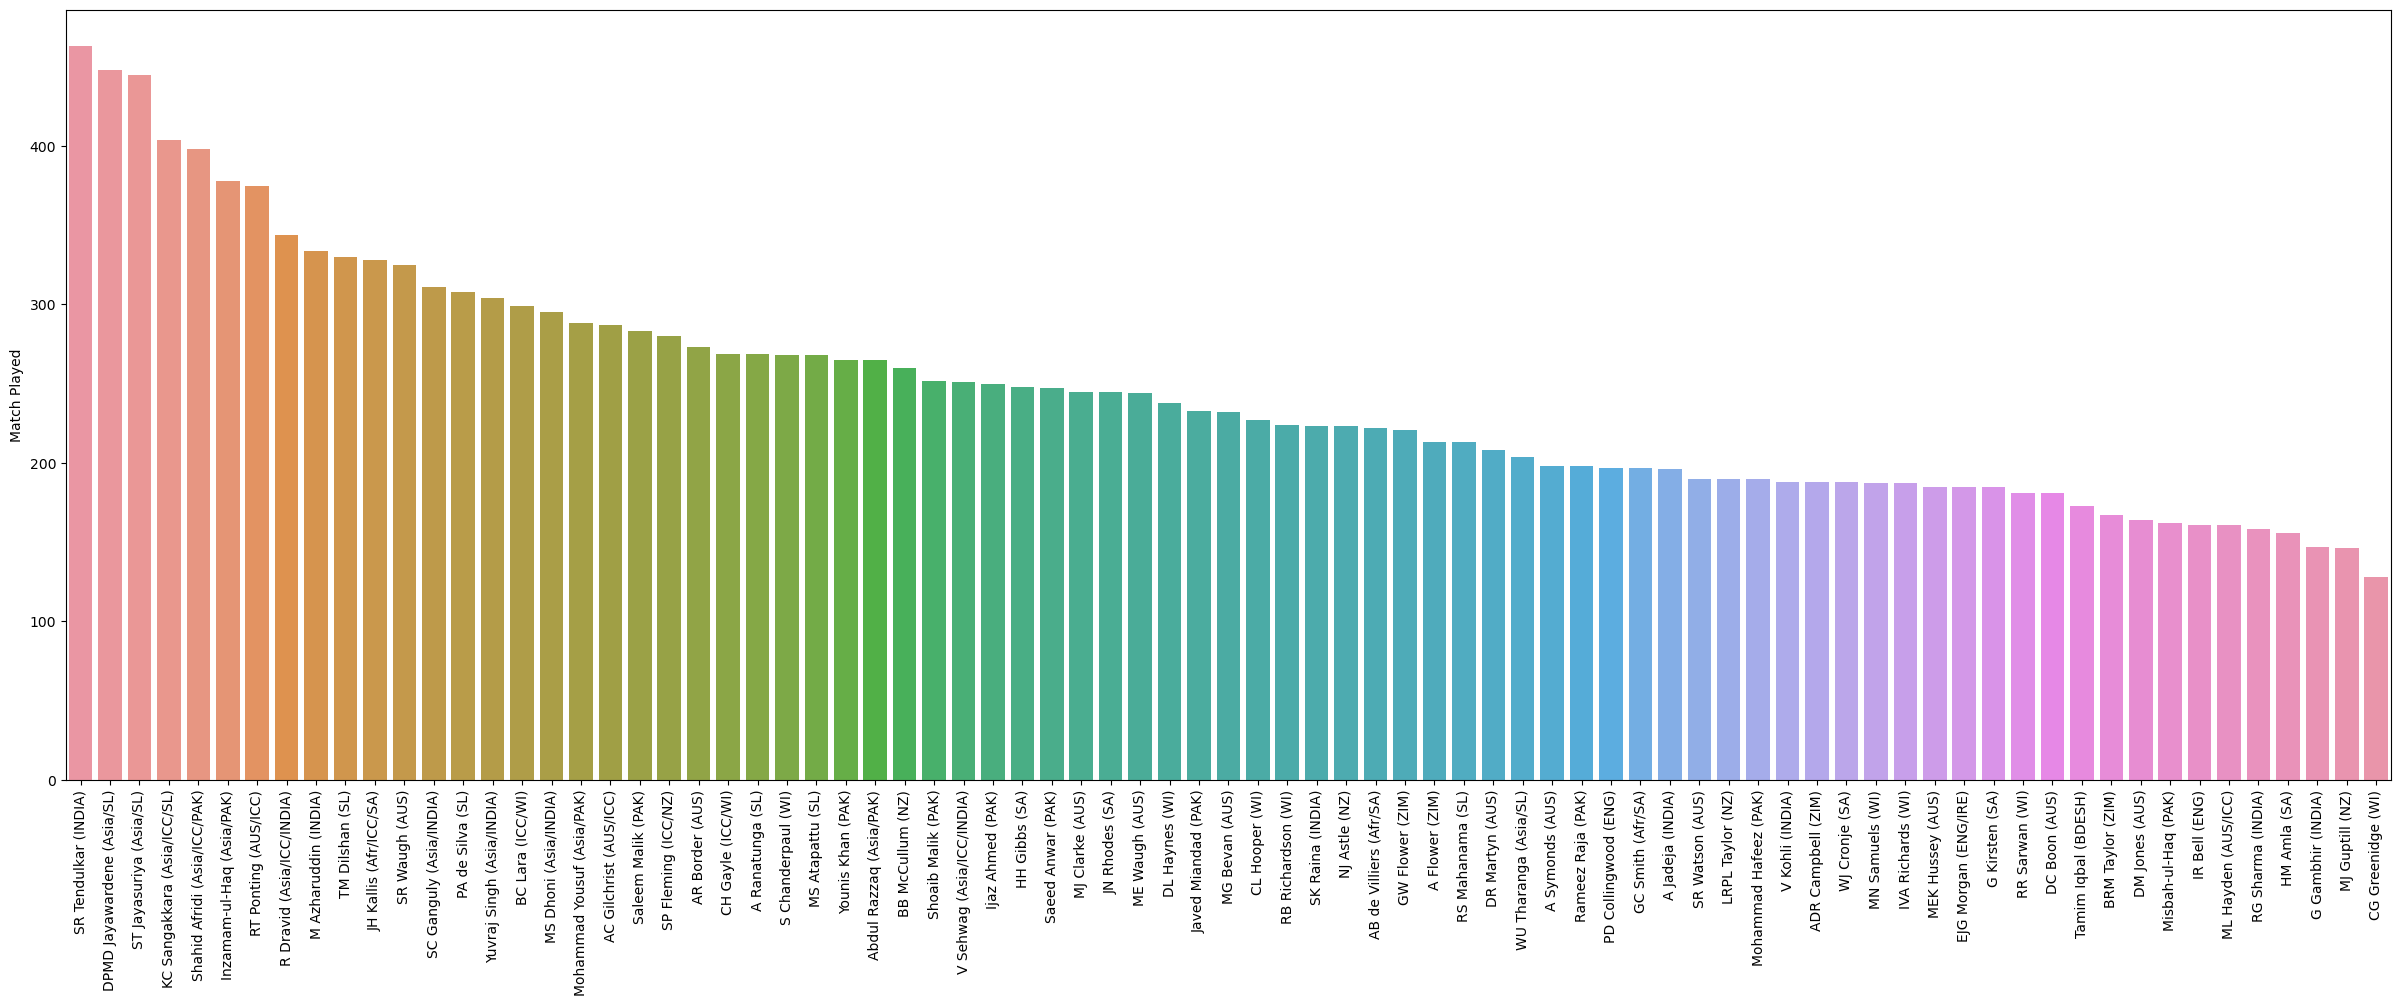

In [65]:
plt.figure(figsize = (30,10))
mat = df[["Player","Mat"]].sort_values("Mat", ascending = False) 

ax = sns.barplot(x='Player', y='Mat', data = mat)
ax.set(xlabel = '', ylabel= 'Match Played')

plt.xticks(rotation=90)
plt.show()

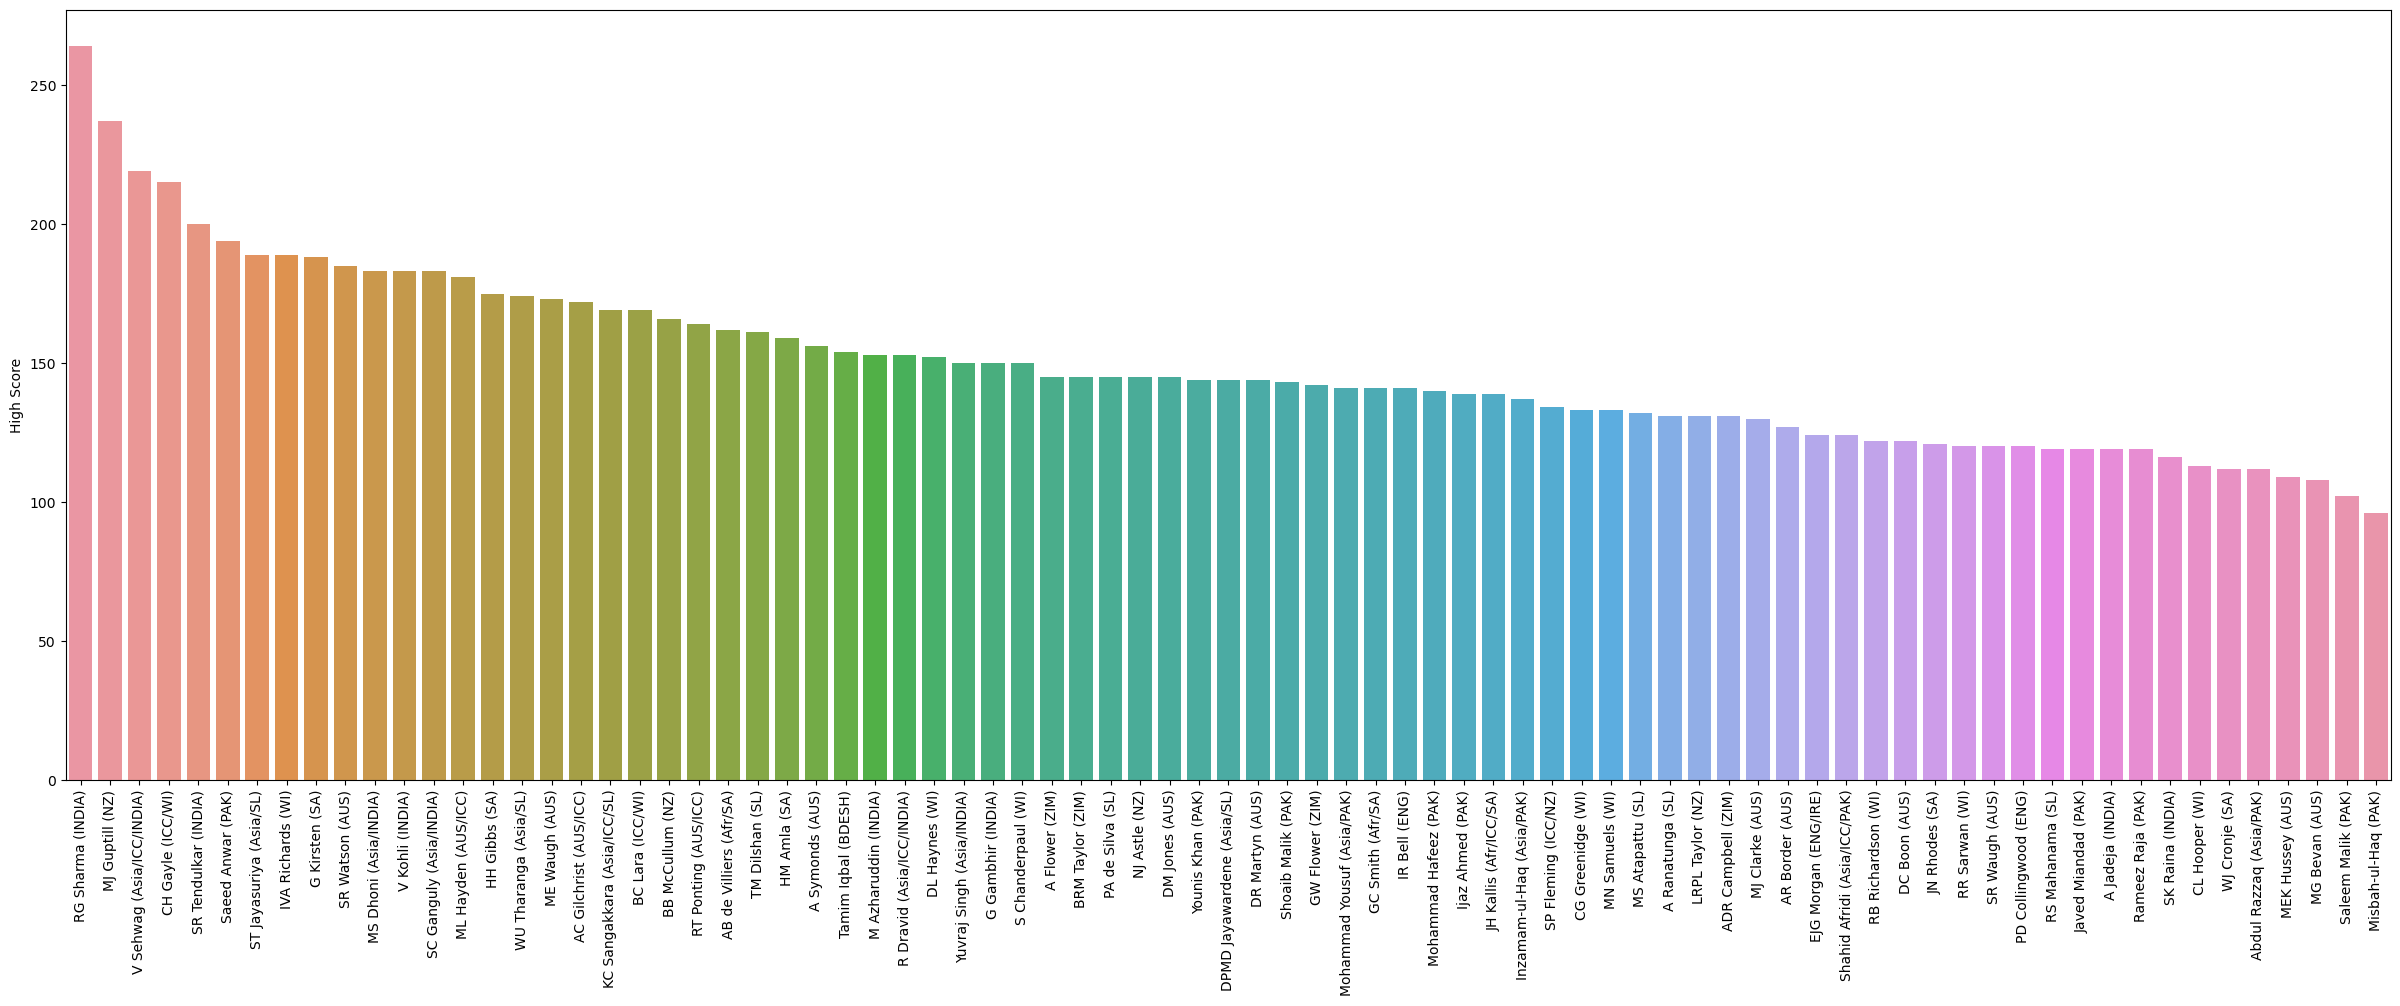

In [66]:
plt.figure(figsize = (30,10))
HS = df[["Player","HS"]].sort_values("HS", ascending = False) 

ax = sns.barplot(x='Player', y='HS', data = HS)
ax.set(xlabel = '', ylabel= 'High Score')

plt.xticks(rotation=90)
plt.show()

In [67]:
df_drop = df.copy()

In [68]:
# Removing the column "Player" because it has the categorical data

player = df_drop.pop("Player")

In [69]:
df_drop

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...
74,128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


# Rescaling The Features

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_drop)

In [71]:
df1 = pd.DataFrame(df_scaled, columns= ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100','50', '0', 'exp'])

In [72]:
df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


# Model Building

In [73]:
from scipy.cluster.hierarchy import linkage       
from scipy.cluster.hierarchy import dendrogram   

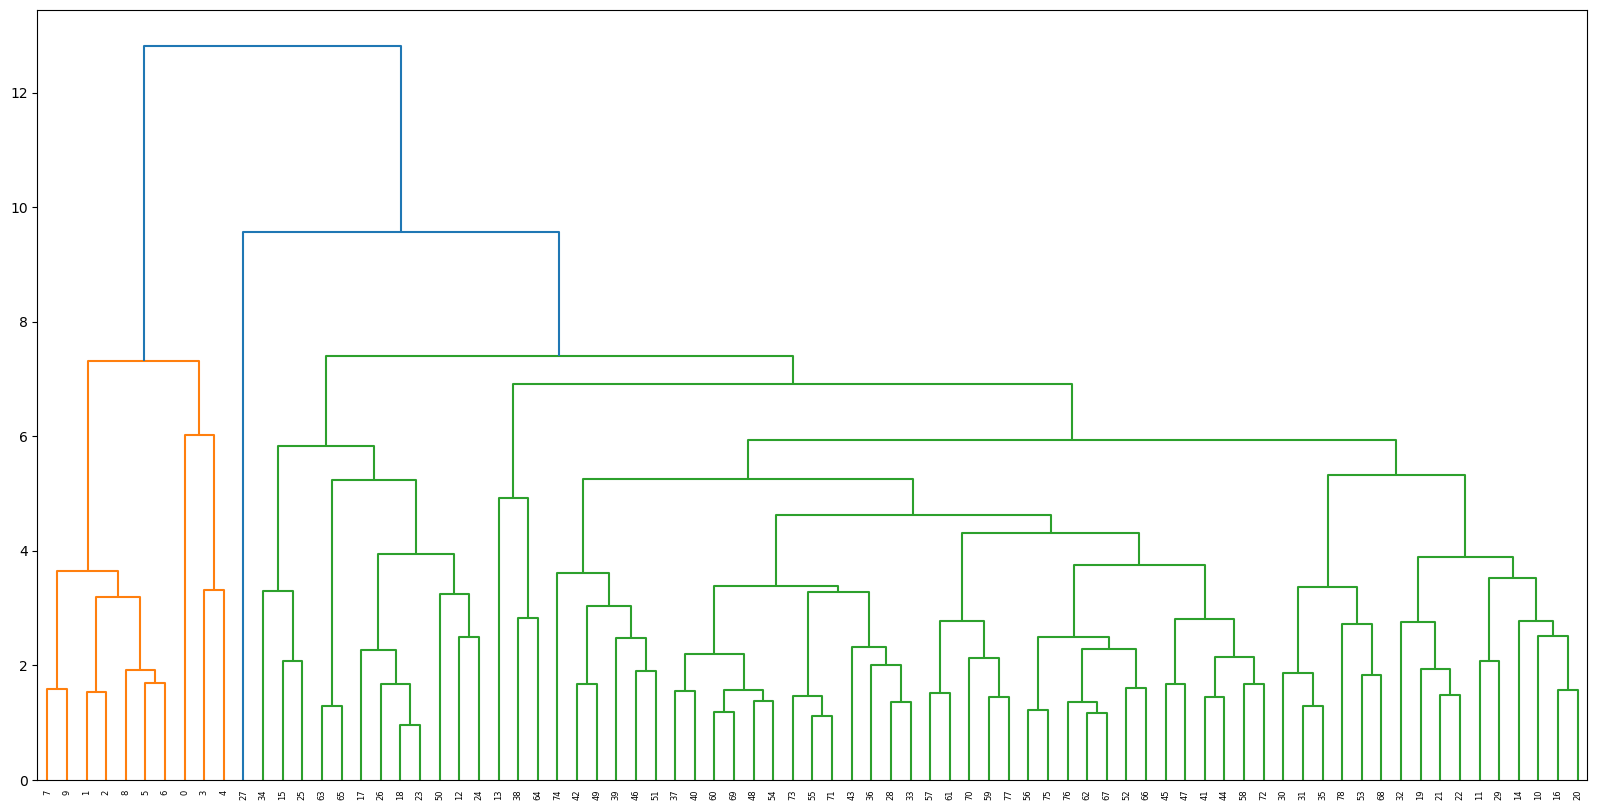

In [74]:
# Complete Linkage


plt.figure(figsize = (20,10))
mergerings = linkage(df1, method = "complete", metric = "euclidean")
dendrogram(mergerings);

In [75]:
# So, here we can see we have 3 cluster as orange, blue & green

# Elbow Method

In [76]:
from sklearn.cluster import KMeans

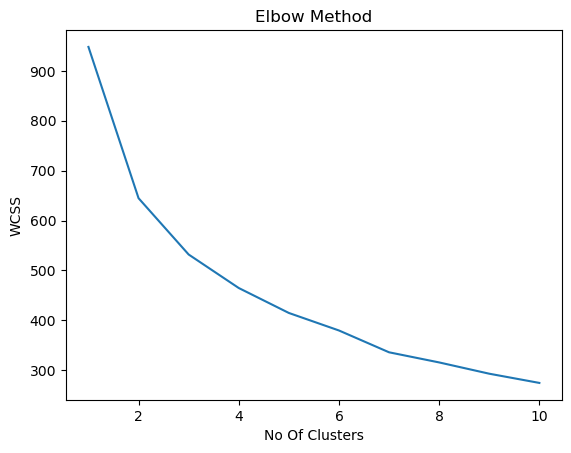

In [77]:
# Using Elbow Method for find the optimal no. of cluster


wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

    
plt.plot(range(1,11), wcss)

plt.title("Elbow Method")
plt.xlabel("No Of Clusters")
plt.ylabel("WCSS");


In [78]:
# above we have 4 bands and mostly we considered the 2nd band i.e 3

# 1. K-Means

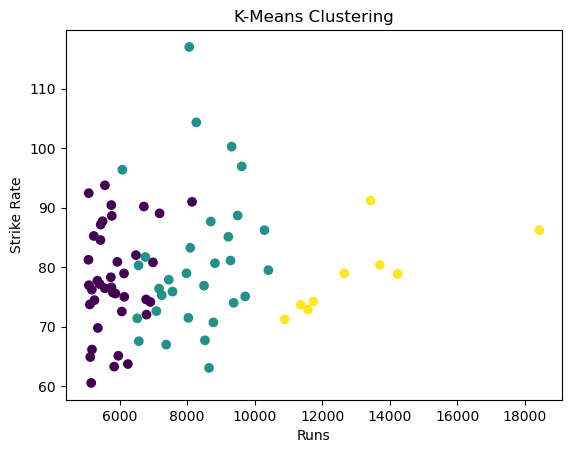

In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing K-Means clusters
plt.scatter(df['Runs'], df['SR'], c=df['kmeans_cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.show()

# 2. Hierarchical Clustering

In [80]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

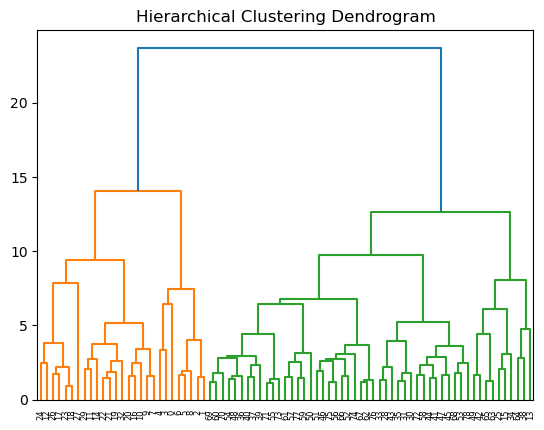

In [81]:
hc = AgglomerativeClustering(n_clusters=3)
df['hierarchical_cluster'] = hc.fit_predict(df1)


linked = linkage(df1, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Silhouette_score

In [82]:
from sklearn.metrics import silhouette_score

# Set the number of clusters (k) to 3
k = 3

# K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(df1)
silhouette_kmeans = silhouette_score(df1, kmeans_labels)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=k)
hierarchical_labels = hierarchical.fit_predict(df1)
silhouette_hierarchical = silhouette_score(df1, hierarchical_labels)

# Print silhouette scores
print(f"Silhouette Score for K-Means (k={k}): {silhouette_kmeans}")
print(f"Silhouette Score for Hierarchical Clustering (k={k}): {silhouette_hierarchical}")

Silhouette Score for K-Means (k=3): 0.21330549499868018
Silhouette Score for Hierarchical Clustering (k=3): 0.1980992831654457


In [83]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp,kmeans_cluster,hierarchical_cluster
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2,2
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2,2


In [87]:
df['kmeans_cluster'].value_counts()


kmeans_cluster
0    39
1    31
2     9
Name: count, dtype: int64

In [88]:
df['hierarchical_cluster'].value_counts()


hierarchical_cluster
0    52
1    19
2     8
Name: count, dtype: int64

# Conclusion

The clustering analysis revealed three distinct clusters among cricket players based on their performance metrics, playing styles, and decision-making attributes.

Cluster 1: comprises players with strong batting performances<br>
Cluster 2: consists of all-rounders who demonstrate a balanced combination of batting and bowling skills<br>
Cluster 3: is characterized by players with a focus on aggressive batting styles and high strike rates.<br>
<br>
These findings offer valuable insights for cricket teams and analysts in understanding player categories and making informed decisions about team composition and strategies.